### Joris

In [18]:
import pandas as pd
import matplotlib.pyplot as plt	
import seaborn as sns
import os
import glob
from pykalman import KalmanFilter
import numpy as np

In [4]:
accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Accelerometer.csv")
barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Barometer.csv")
gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Gyroscope.csv")
linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Linear Accelerometer.csv")
location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Location.csv")
magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Magnetometer.csv")
proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Proximity.csv")

In [9]:
def plot_sensor_data(sensor_data_dict, time_col="Time (s)"):
    fig, axs = plt.subplots(len(sensor_data_dict), 1, figsize=(15, 20), sharex=True)

    if len(sensor_data_dict) == 1:
        axs = [axs]

    for ax, (label, df) in zip(axs, sensor_data_dict.items()):
        if time_col not in df.columns:
            continue
        df = df.dropna()  # Verwijder lege rijen

        time = df[time_col]
        for col in df.columns:
            if col == time_col:
                continue
            ax.plot(time, df[col], label=col)

        ax.set_title(label)
        ax.legend(loc='upper right')
        ax.grid(False)  # Verwijder gridlines

    axs[-1].set_xlabel('Time (s)')
    plt.tight_layout()
    plt.show()


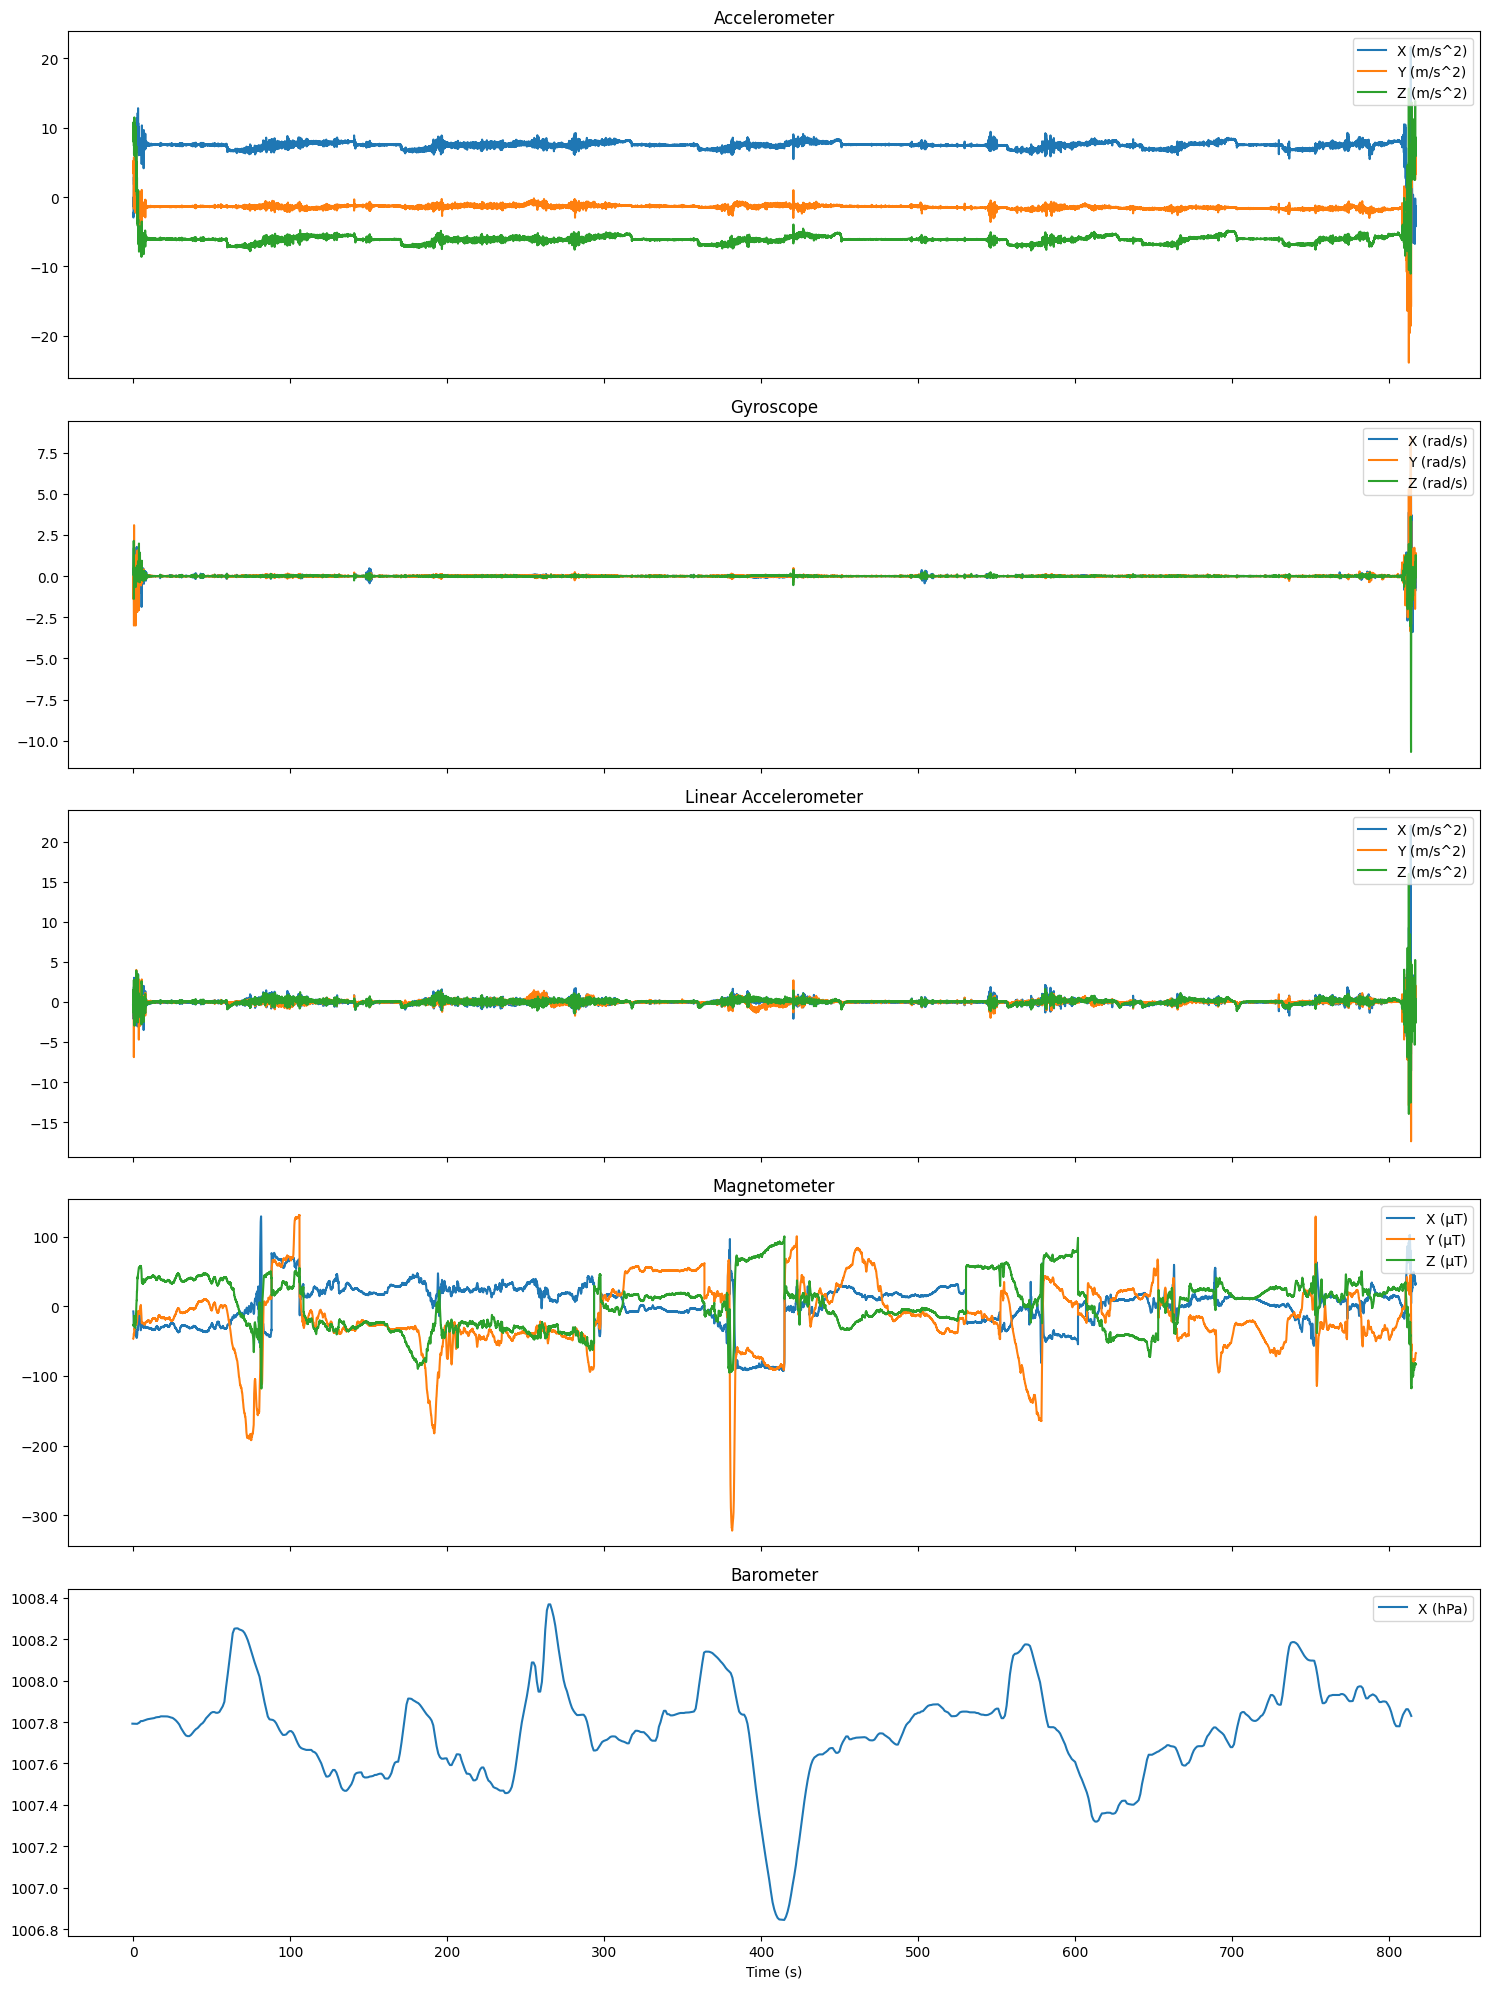

In [10]:
sensor_data_dict = {
    "Accelerometer": accelerometer_df,
    "Gyroscope": gyroscope_df,
    "Linear Accelerometer": linear_accelerometer_df,
    "Magnetometer": magnetometer_df,
    "Barometer": barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

plot_sensor_data(sensor_data_dict)


In [11]:
auto_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Accelerometer.csv")
auto_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Barometer.csv")
auto_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Gyroscope.csv")
auto_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Linear Accelerometer.csv")
auto_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Location.csv")
auto_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Magnetometer.csv")
auto_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Proximity.csv")

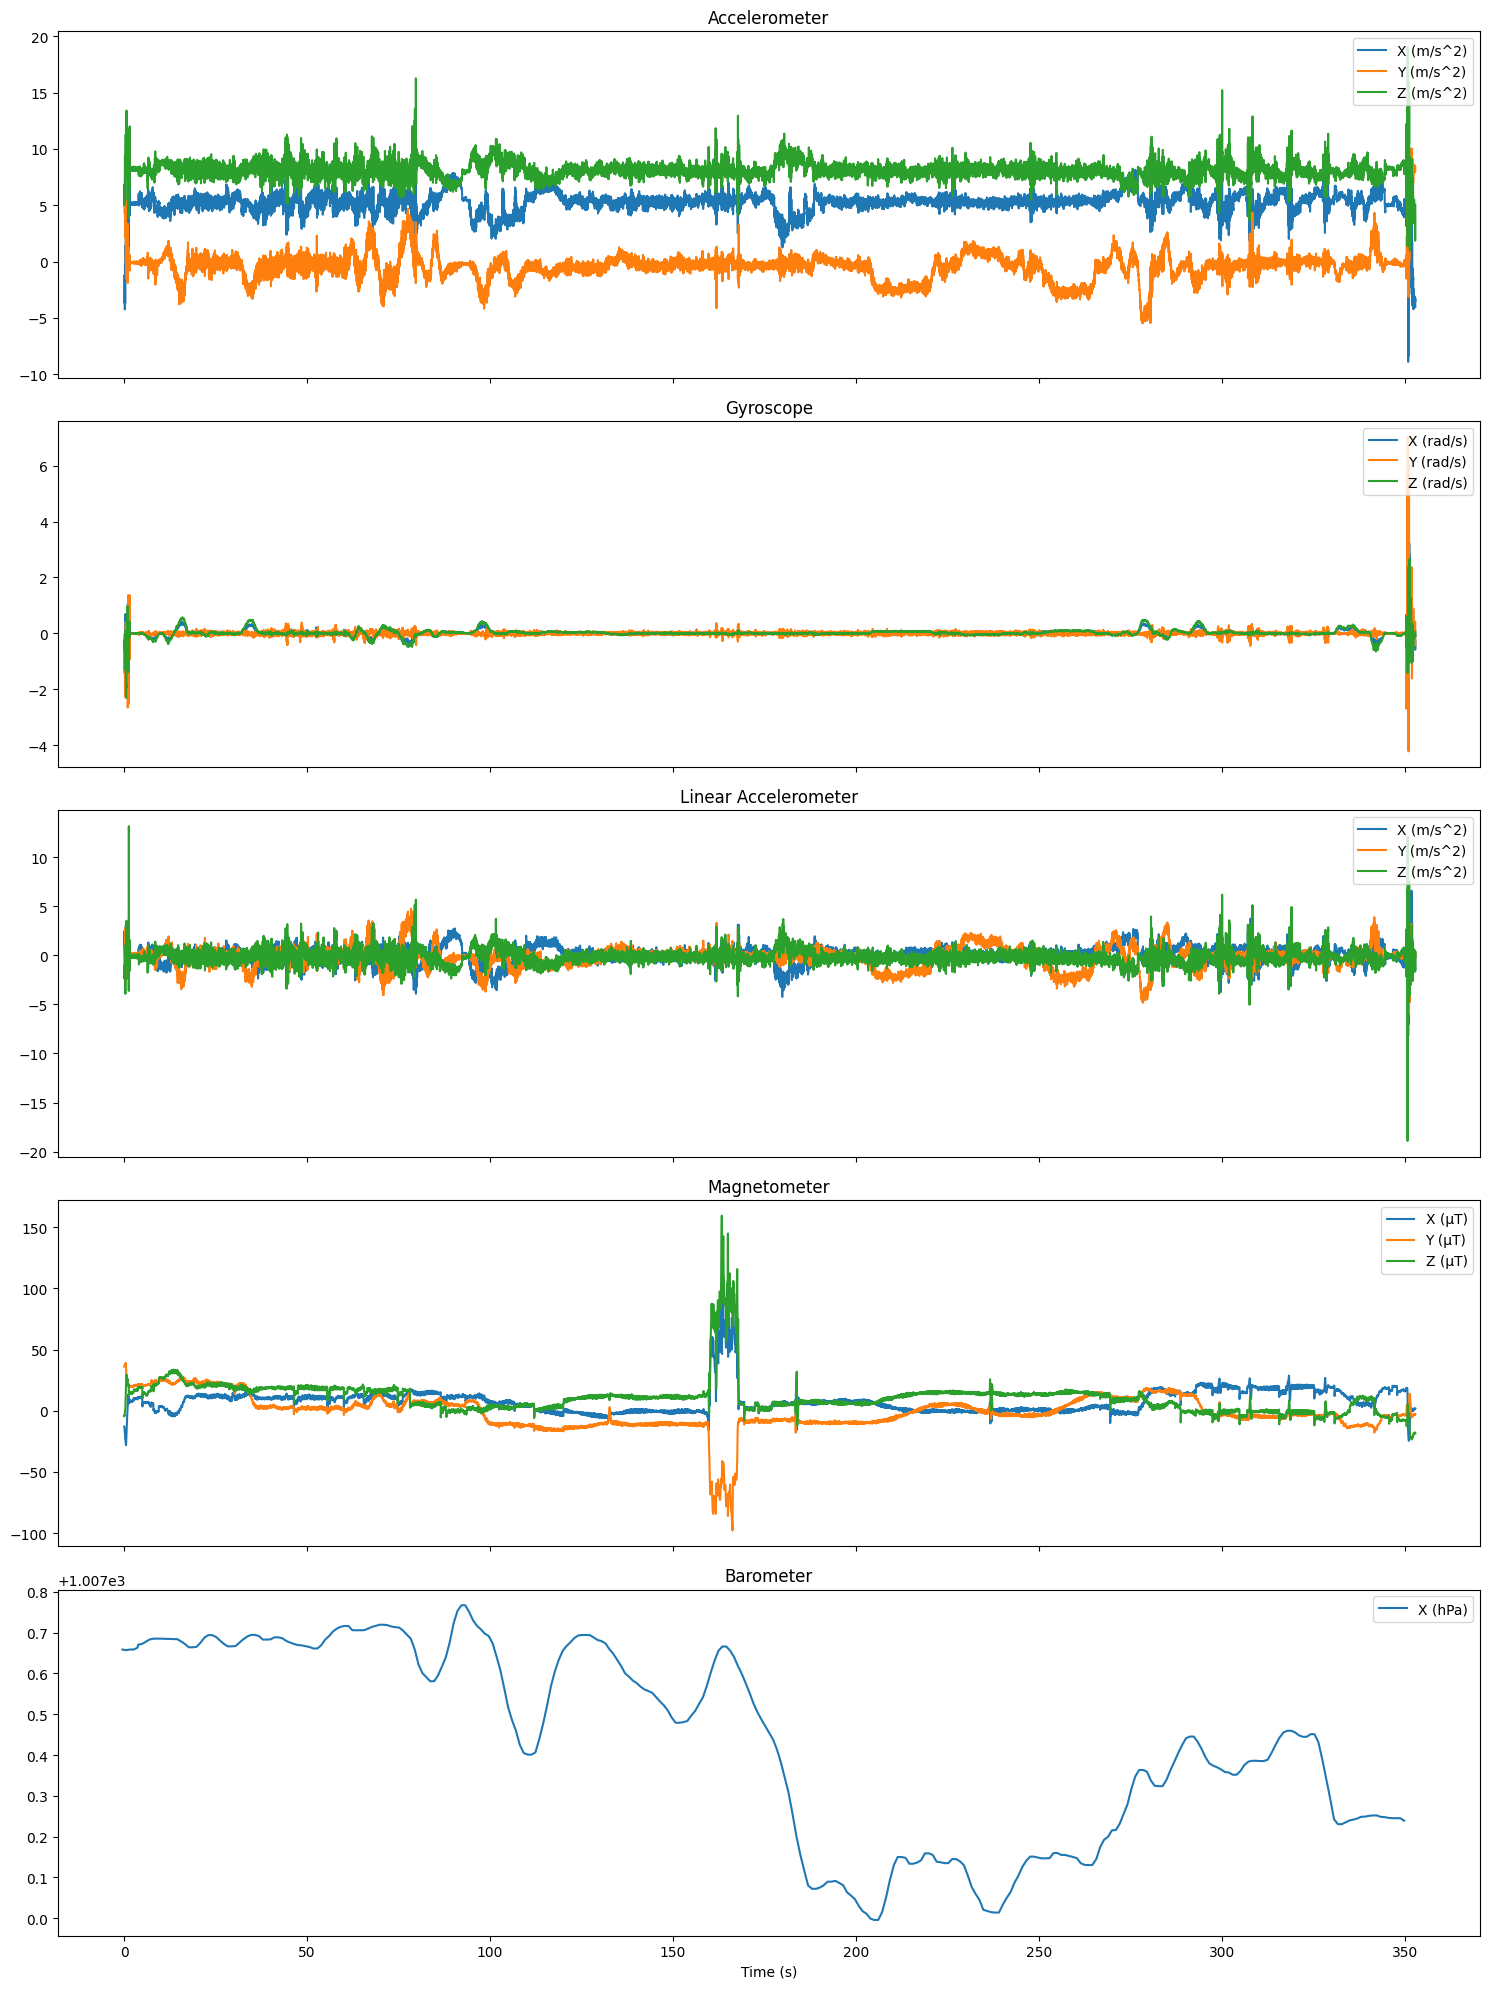

In [12]:
sensor_data_dict_auto = {
    "Accelerometer": auto_accelerometer_df,
    "Gyroscope": auto_gyroscope_df,
    "Linear Accelerometer": auto_linear_accelerometer_df,
    "Magnetometer": auto_magnetometer_df,
    "Barometer": auto_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

plot_sensor_data(sensor_data_dict_auto)

In [21]:
ren_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Accelerometer.csv")
ren_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Barometer.csv")
ren_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Gyroscope.csv")
ren_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Linear Accelerometer.csv")
ren_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Location.csv")
ren_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Magnetometer.csv")
ren_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Proximity.csv")

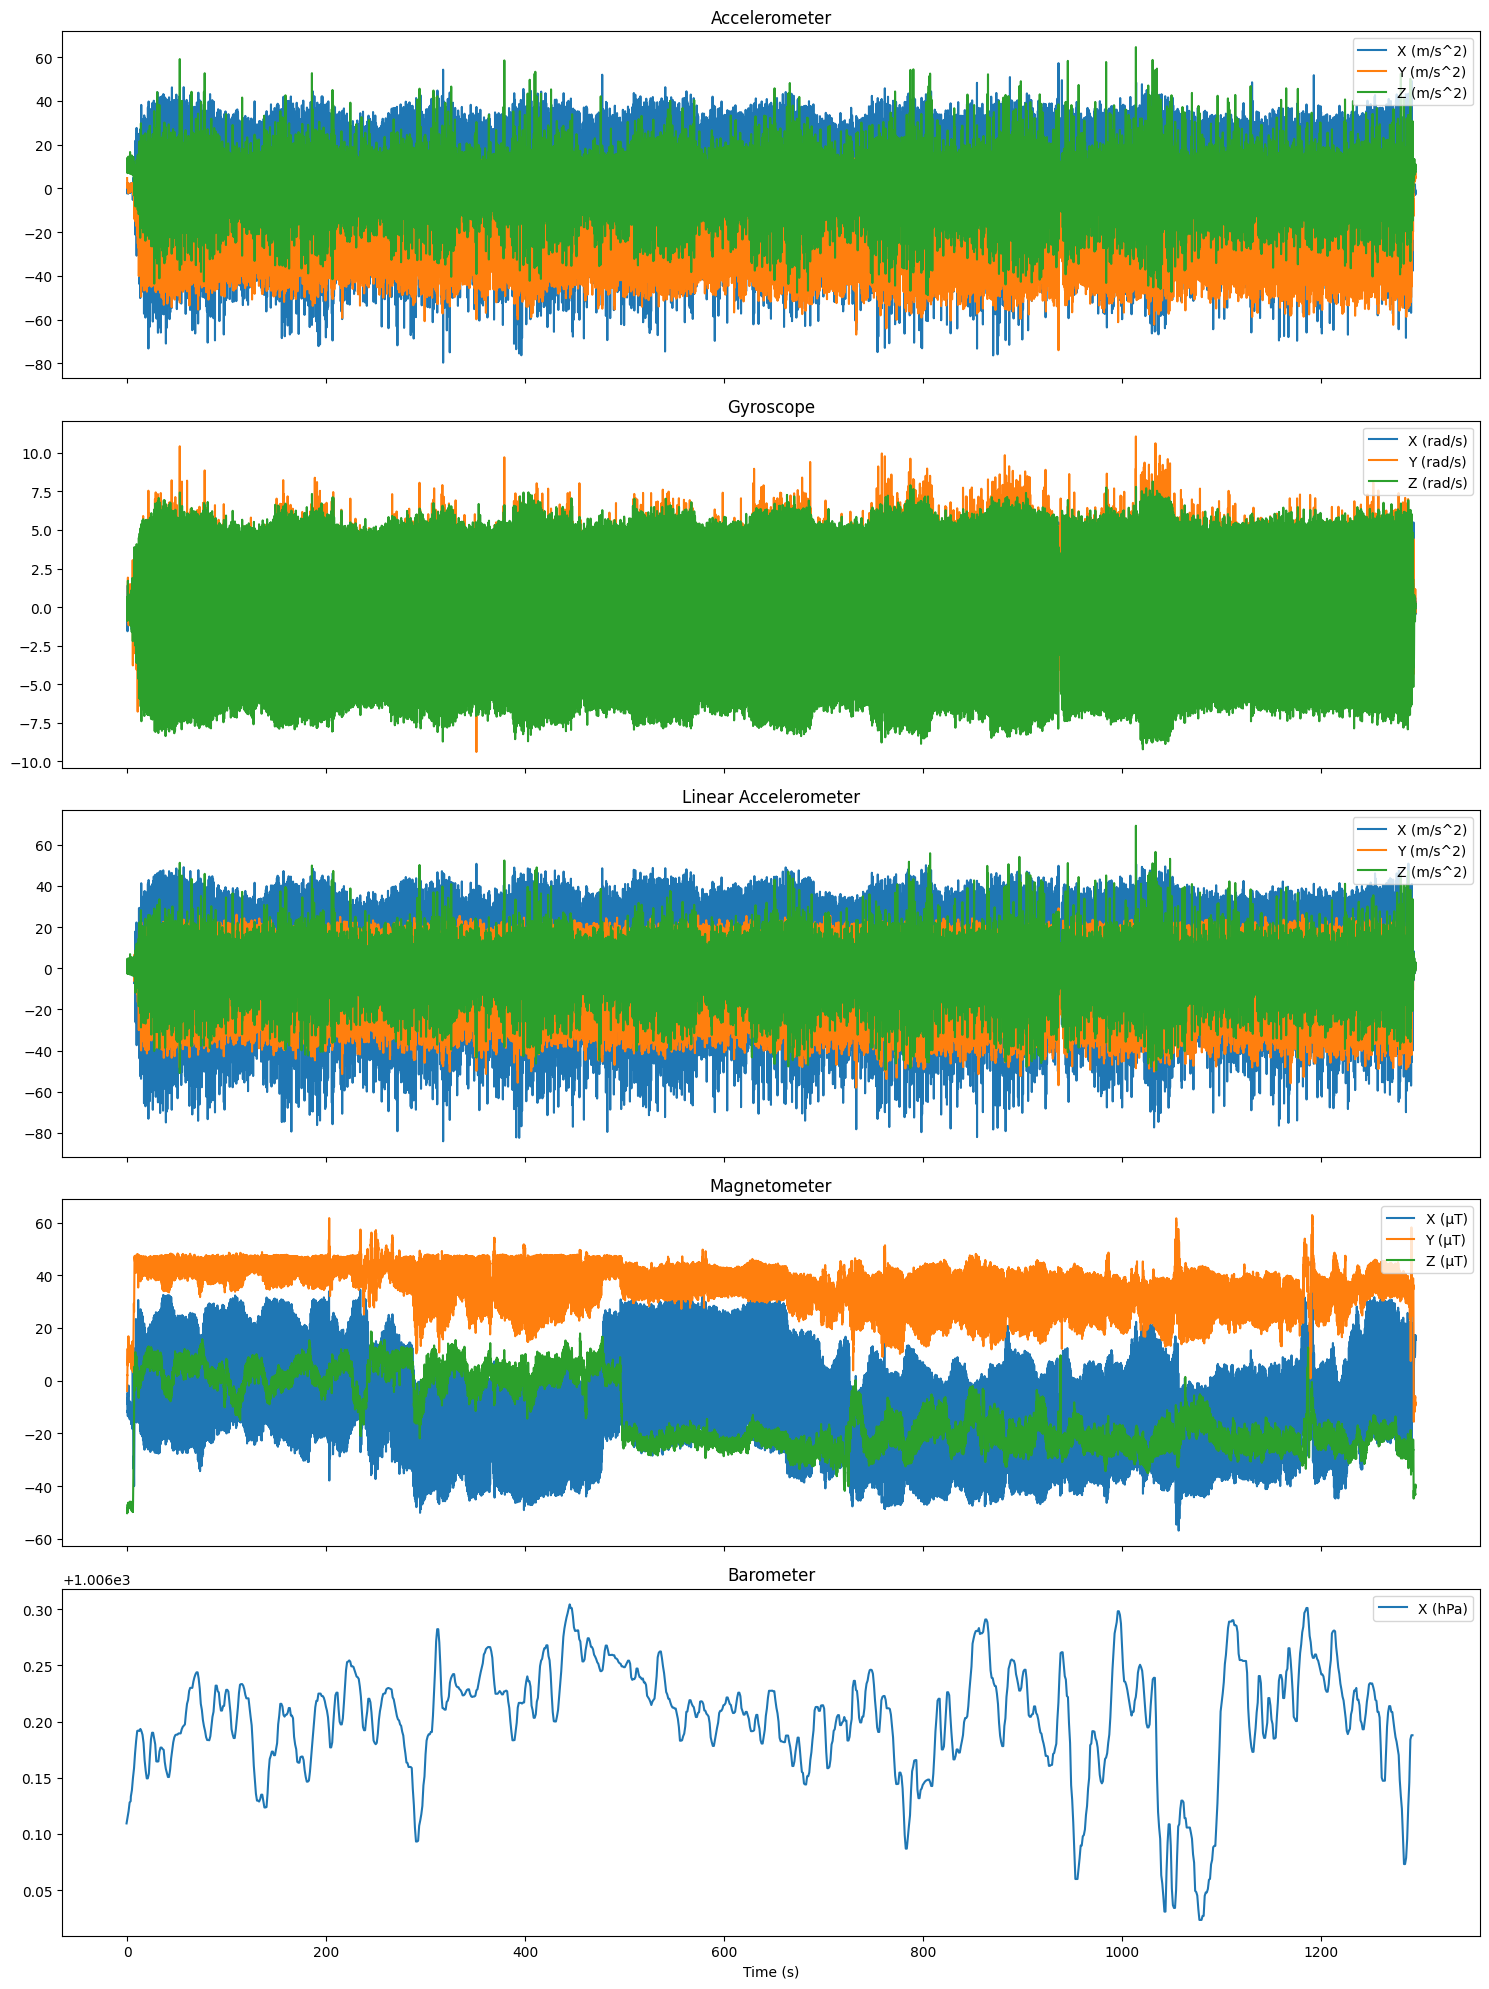

In [22]:
sensor_data_dict_rennen = {
    "Accelerometer": ren_accelerometer_df,
    "Gyroscope": ren_gyroscope_df,
    "Linear Accelerometer": ren_linear_accelerometer_df,
    "Magnetometer": ren_magnetometer_df,
    "Barometer": ren_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

plot_sensor_data(sensor_data_dict_rennen)

In [23]:
fiets_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Accelerometer.csv")
fiets_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Barometer.csv")
fiets_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Gyroscope.csv")
fiets_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Linear Accelerometer.csv")
fiets_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Location.csv")
fiets_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Magnetometer.csv")
fiets_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Proximity.csv")


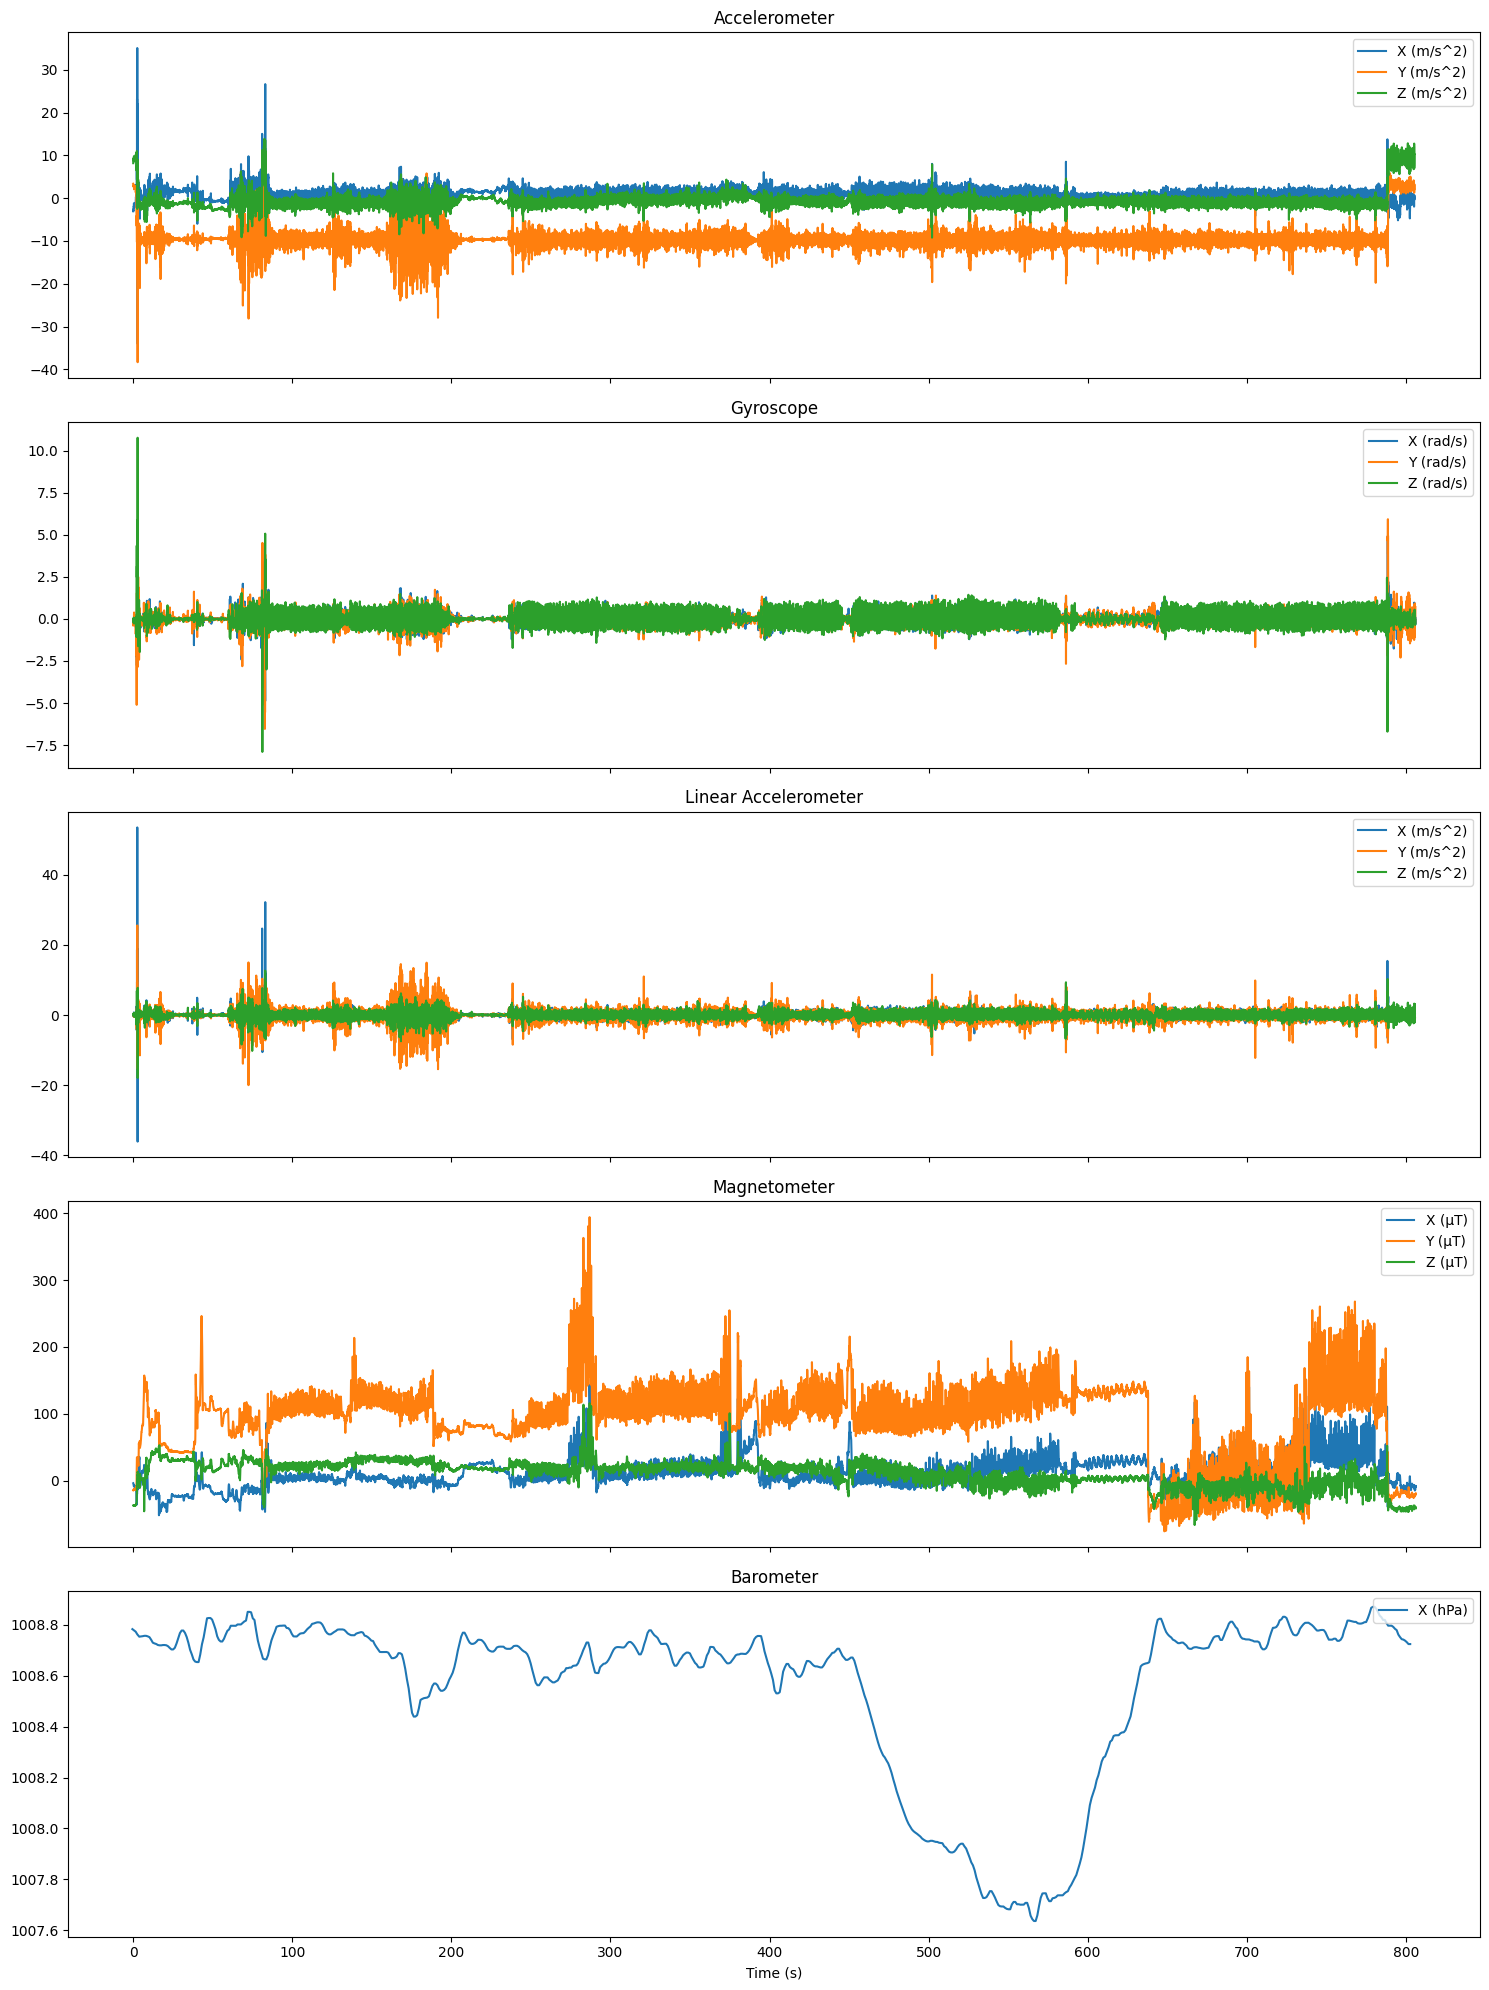

In [24]:
sensor_data_dict_fietsen = {
    "Accelerometer": fiets_accelerometer_df,
    "Gyroscope": fiets_gyroscope_df,
    "Linear Accelerometer": fiets_linear_accelerometer_df,
    "Magnetometer": fiets_magnetometer_df,
    "Barometer": fiets_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

plot_sensor_data(sensor_data_dict_fietsen)


Kalman

In [19]:
def apply_kalman_and_impute(df, columns, time_col="Time (s)", threshold_std=3):
    result_df = df.copy()
    for col in columns:
        data = df[col].values
        # Kalman filter instellen
        kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
        kf = kf.em(data, n_iter=5)
        filtered_state_means, _ = kf.filter(data)

        # Outlier detectie
        residuals = data - filtered_state_means.flatten()
        threshold = threshold_std * np.std(residuals)
        outliers = np.abs(residuals) > threshold

        # Imputatie
        result_df[col + "_filtered"] = filtered_state_means
        result_df[col + "_imputed"] = data.copy()
        result_df.loc[outliers, col + "_imputed"] = filtered_state_means.flatten()[outliers]

        # Plot (optioneel)
        plt.figure(figsize=(12, 4))
        plt.plot(df[time_col], data, label='Origineel', alpha=0.5)
        plt.plot(df[time_col], filtered_state_means, label='Kalman Filter', linewidth=2)
        plt.plot(df[time_col], result_df[col + "_imputed"], label='Imputed', linestyle='--')
        plt.scatter(df[time_col][outliers], data[outliers], color='red', label='Outliers', zorder=5)
        plt.title(f"Kalman filtering & imputatie - {col}")
        plt.legend()
        plt.xlabel("Tijd (s)")
        plt.ylabel(col)
        plt.grid(False)
        plt.tight_layout()
        plt.show()

    return result_df

In [ ]:
"X (µT)","Y (µT)","Z (µT)"

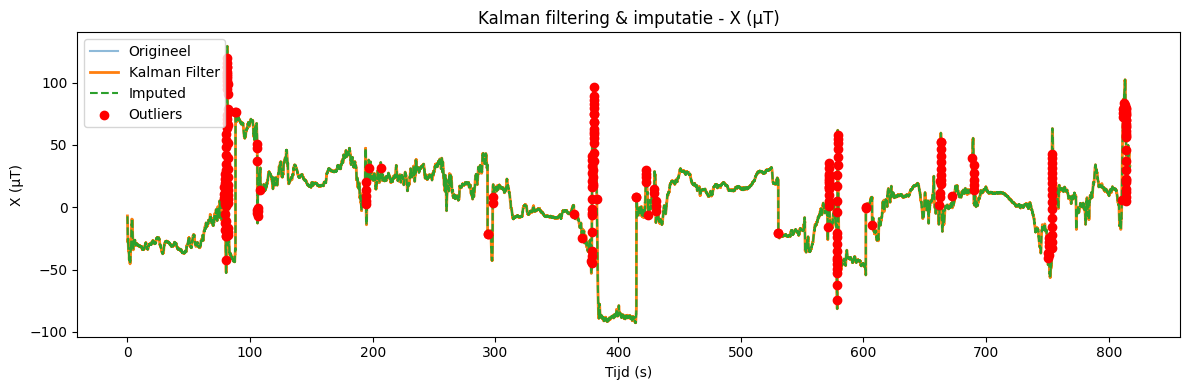

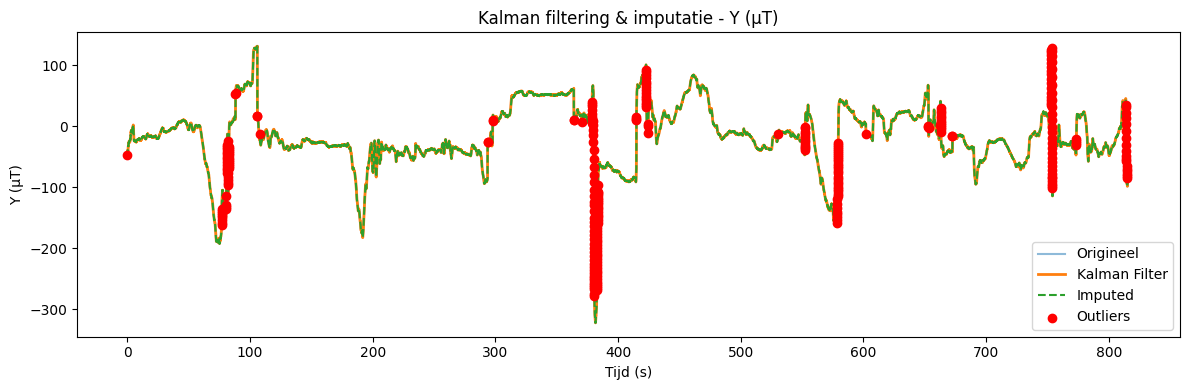

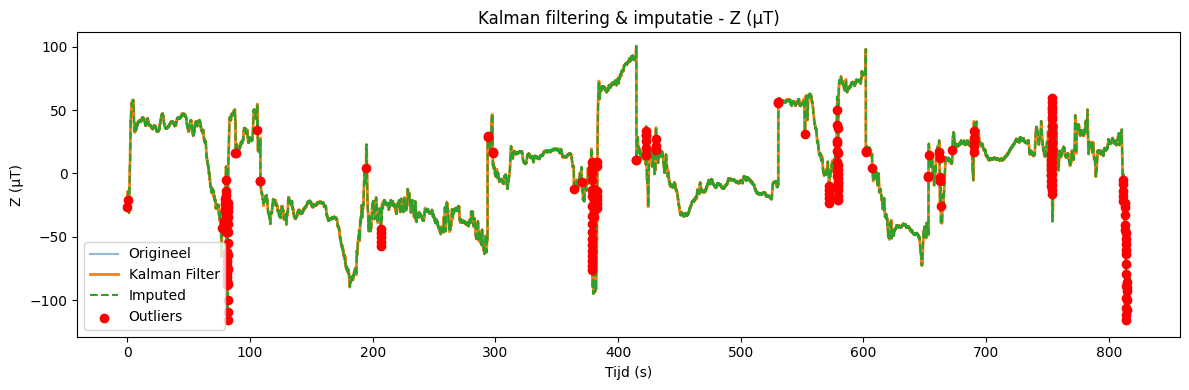

In [20]:
# Verondersteld dat je kolommen x, y, z hebt
filtered_magnetometer_df = apply_kalman_and_impute(magnetometer_df, columns=["X (µT)","Y (µT)","Z (µT)"])
